## CONCEPT EXAMPLE ACCUMULATION DATA



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

In [6]:


def load_numpy_arrays_from_paths(paths, array_filename):
    results = {}

    for name, path in paths.items():
        arrays = []
        if not os.path.exists(path):
            print(f"Warning: Path does not exist: {path}")
            continue
        
        for subdir in sorted(os.listdir(path)):  
            subdir_path = os.path.join(path, subdir)
            if os.path.isdir(subdir_path):  
                array_path = os.path.join(subdir_path, array_filename)
                if os.path.isfile(array_path):  
                    try:
                        arr = np.load(array_path)  
                        arrays.append(arr)
                    except Exception as e:
                        print(f"Error loading {array_path}: {e}")
        
        results[name] = arrays  

    return results

In [7]:
approach_colors = {
    "random_policy": "blue",
    "model_of_interest_greedy": "green",
    "model_of_interest_greedy_epsilon0.05": "orange",
    "more_capable_model_greedy": "purple",
    "more_capable_model_greedy_epsilon0.05": "red"
}

def plot_concept_example_accumulation_per_approach(concept_data, concept_name):
    plt.figure(figsize=(12, 6))
    
    for approach, data_lists in concept_data.items():

        max_length = max(len(lst) for lst in data_lists)

        mean_values = np.mean(data_lists, axis=0)
        std_values = np.std(data_lists, axis=0)
        timesteps = np.arange(max_length)

        main_color = approach_colors[approach]
        shaded_color = mcolors.to_rgba(main_color, alpha=0.2)  

        plt.plot(timesteps, mean_values, label=approach, color=main_color, linewidth=2)
        plt.fill_between(timesteps, mean_values - std_values, mean_values + std_values, color=shaded_color)

    plt.xlabel("Timesteps")
    plt.ylabel("Accumulated concept examples")
    plt.title(f"Unique concept examples accumulated over timesteps for concept: {concept_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

### Concept example accumulation - GemCollector


In [8]:
gc_paths = {
    "random_policy": "../../rl_tcav_data/concept_examples/gem_collector/random_policy_play",
    "model_of_interest_greedy": "../../rl_tcav_data/concept_examples/gem_collector/model_of_interest_greedy_play",
    "model_of_interest_greedy_epsilon0.05": "../../rl_tcav_data/concept_examples/gem_collector/model_of_interest_epsilon0_005_play",
    "more_capable_model_greedy": "../../rl_tcav_data/concept_examples/gem_collector/more_capable_model_greedy_play",
    "more_capable_model_greedy_epsilon0.05": "../../rl_tcav_data/concept_examples/gem_collector/more_capable_model_epsilon0_005_play"
}

In [9]:
lava_1_above_pos_examples_acc_data = load_numpy_arrays_from_paths(gc_paths,"binary_concept_lava_1_above_positive_examples_accumulation_data_100000_iterations.npy")
lava_1_above_neg_examples_acc_data = load_numpy_arrays_from_paths(gc_paths,"binary_concept_lava_1_above_negative_examples_accumulation_data_100000_iterations.npy")

aquamarine_left_pos_examples_acc_data = load_numpy_arrays_from_paths(gc_paths,"binary_concept_aquamarine_left_positive_examples_accumulation_data_100000_iterations.npy")
aquamarine_left_neg_examples_acc_data = load_numpy_arrays_from_paths(gc_paths,"binary_concept_aquamarine_left_negative_examples_accumulation_data_100000_iterations.npy")


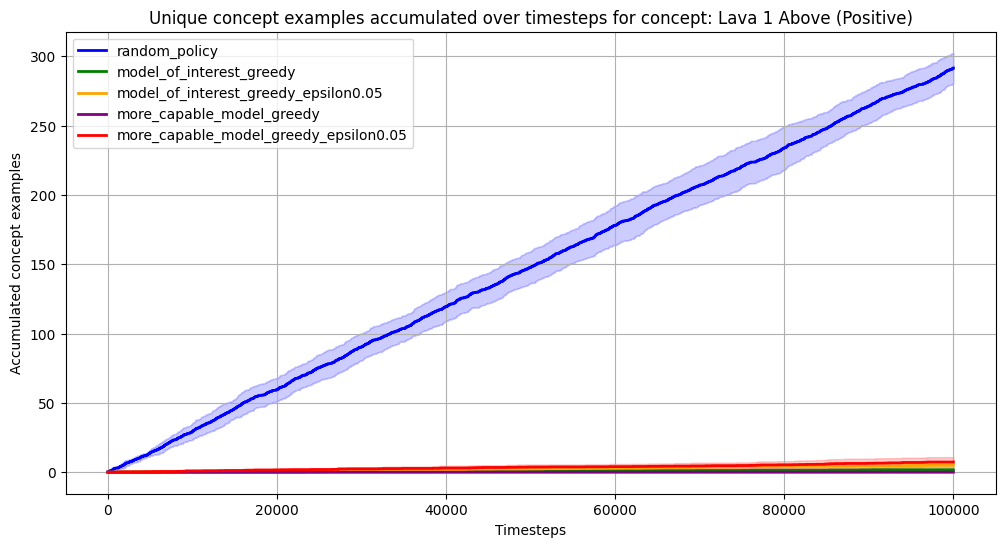

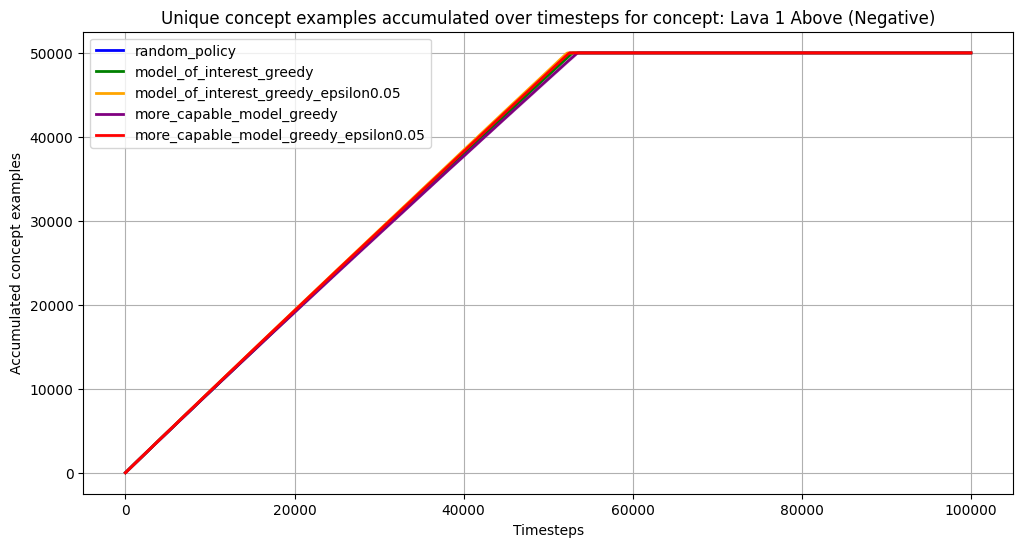

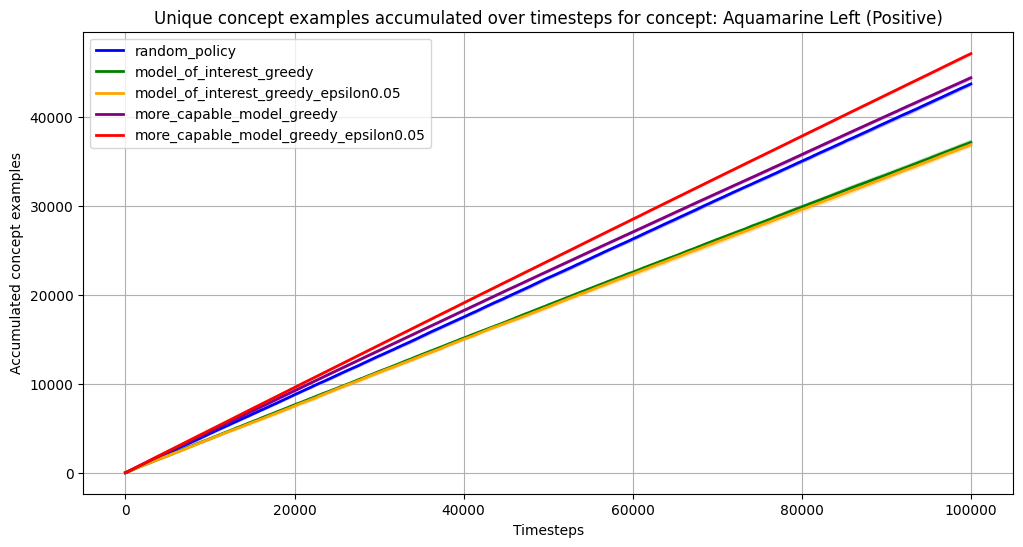

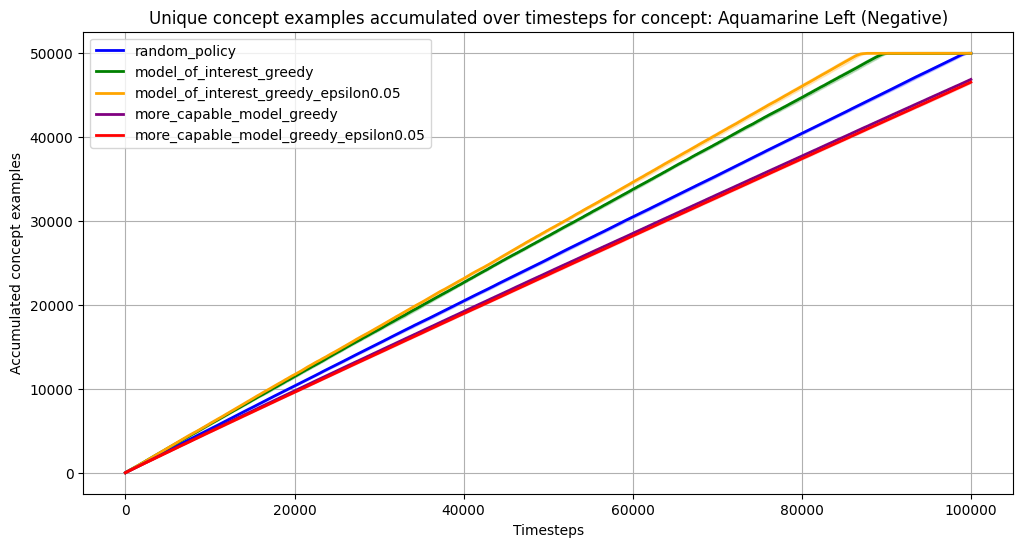

In [10]:
plot_concept_example_accumulation_per_approach(lava_1_above_pos_examples_acc_data, "Lava 1 Above (Positive)")
plot_concept_example_accumulation_per_approach(lava_1_above_neg_examples_acc_data, "Lava 1 Above (Negative)")
plot_concept_example_accumulation_per_approach(aquamarine_left_pos_examples_acc_data, "Aquamarine Left (Positive)")
plot_concept_example_accumulation_per_approach(aquamarine_left_neg_examples_acc_data, "Aquamarine Left (Negative)")

In [11]:
def find_val_set_size(pos_acc_data, neg_acc_data):
    sum_of_avg_in_approaches = 0
    for approach in pos_acc_data.keys():
        sum_batch_train_size = 0
        for i in range(len(pos_acc_data[approach])):
            max_pos = max(pos_acc_data[approach][i])
            if neg_acc_data is not None:
                max_neg = max(neg_acc_data[approach][i])
                min_of_max = min(max_pos, max_neg)
                sum_batch_train_size += min_of_max * 2
            else:
                sum_batch_train_size += max_pos
        avg_batch_train_size_in_approach = sum_batch_train_size / len(pos_acc_data[approach])
        sum_of_avg_in_approaches += avg_batch_train_size_in_approach
    return sum_of_avg_in_approaches / len(pos_acc_data.keys()) * 0.2



print(find_val_set_size(aquamarine_left_pos_examples_acc_data, aquamarine_left_neg_examples_acc_data))
print(find_val_set_size(lava_1_above_pos_examples_acc_data, lava_1_above_neg_examples_acc_data))

16705.072
24.464000000000002


### Concept example accumulation - MinecartCounter


In [12]:
mc_paths = {
    "random_policy": "../../rl_tcav_data/concept_examples/minecart_counter/random_policy_play",
    "model_of_interest_greedy": "../../rl_tcav_data/concept_examples/minecart_counter/model_of_interest_greedy_play",
    "model_of_interest_greedy_epsilon0.05": "../../rl_tcav_data/concept_examples/minecart_counter/model_of_interest_epsilon0_005_play",
    "more_capable_model_greedy": "../../rl_tcav_data/concept_examples/minecart_counter/more_capable_model_greedy_play",
    "more_capable_model_greedy_epsilon0.05": "../../rl_tcav_data/concept_examples/minecart_counter/more_capable_model_epsilon0_005_play"
}

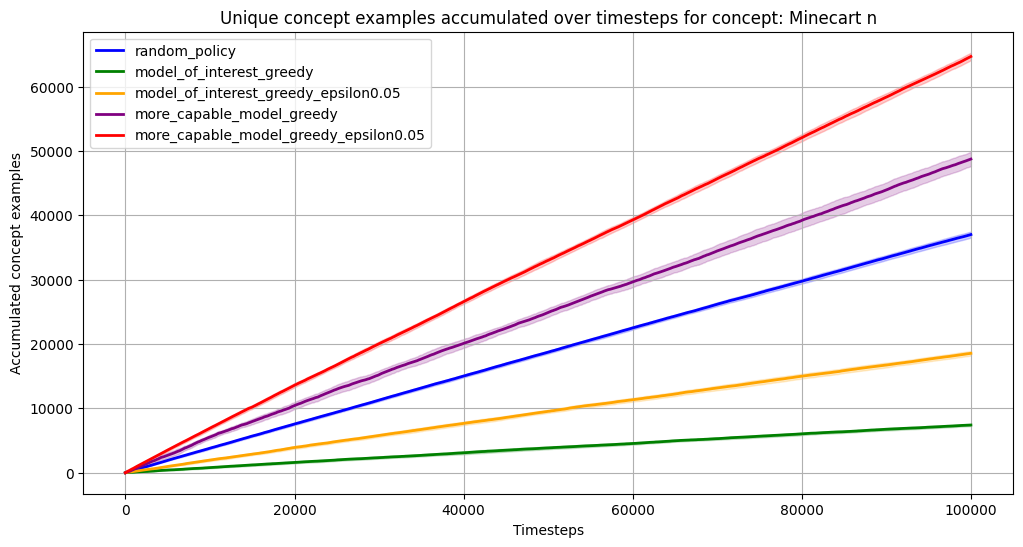

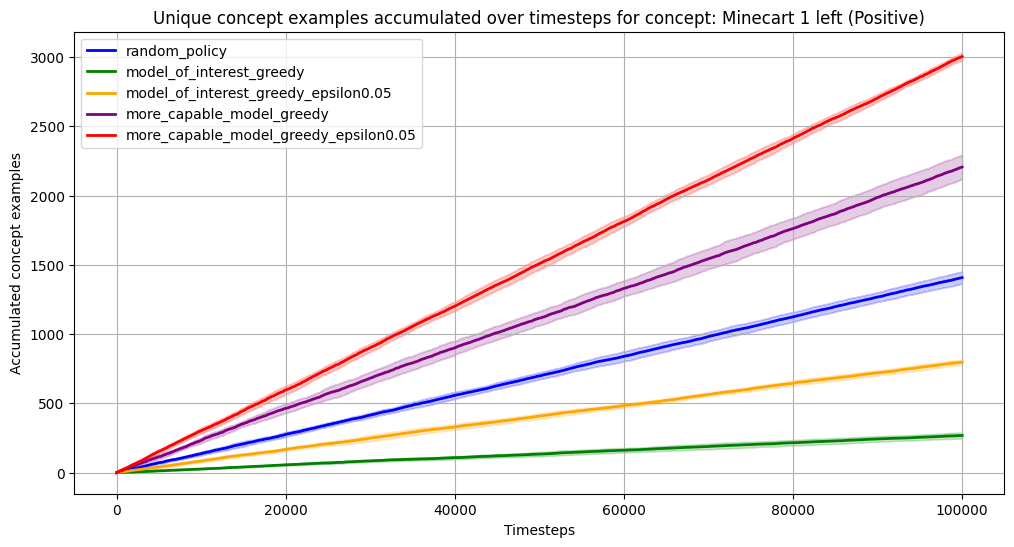

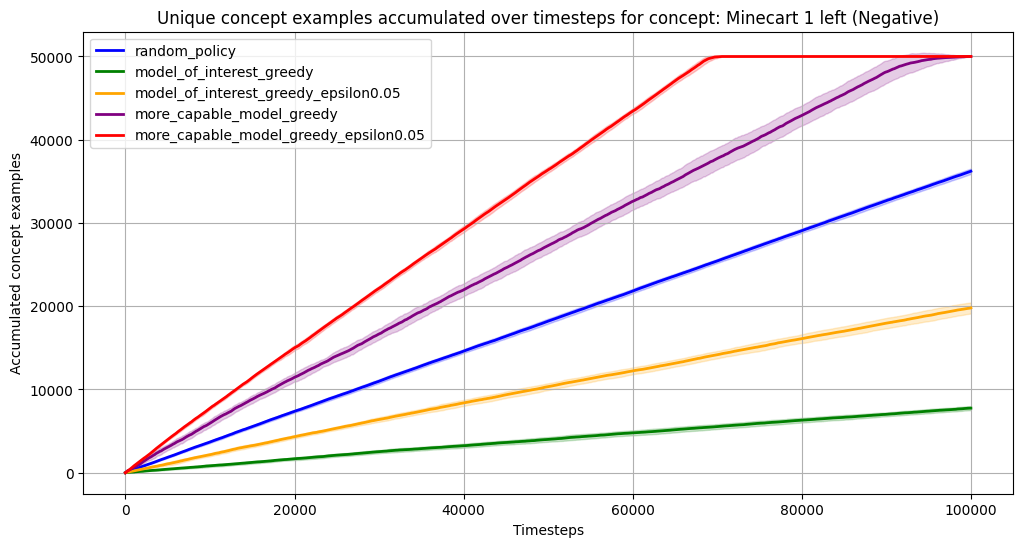

In [13]:
minecart_n_examples_acc_data = load_numpy_arrays_from_paths(mc_paths,"continuous_concept_minecarts_n_100000_examples_accumulation_data.npy")

minecart_1_left_pos_examples_acc_data = load_numpy_arrays_from_paths(mc_paths,"binary_concept_minecart_1_left_positive_examples_accumulation_data_100000_iterations.npy")
minecart_1_left_neg_examples_acc_data = load_numpy_arrays_from_paths(mc_paths,"binary_concept_minecart_1_left_negative_examples_accumulation_data_100000_iterations.npy")


plot_concept_example_accumulation_per_approach(minecart_n_examples_acc_data, "Minecart n")
plot_concept_example_accumulation_per_approach(minecart_1_left_pos_examples_acc_data, "Minecart 1 left (Positive)")
plot_concept_example_accumulation_per_approach(minecart_1_left_neg_examples_acc_data, "Minecart 1 left (Negative)")




In [14]:
print(find_val_set_size(minecart_1_left_pos_examples_acc_data, minecart_1_left_neg_examples_acc_data))
print(find_val_set_size(minecart_n_examples_acc_data, None))

614.552
7054.328


### Concept example accumulation - GoldRun

In [15]:
grm_paths = {
    "random_policy": "../../rl_tcav_data/concept_examples/gold_run_mini/random_policy_play",
    "model_of_interest_greedy": "../../rl_tcav_data/concept_examples/gold_run_mini/model_of_interest_greedy_play",
    "model_of_interest_greedy_epsilon0.05": "../../rl_tcav_data/concept_examples/gold_run_mini/model_of_interest_epsilon0_005_play",
    "more_capable_model_greedy": "../../rl_tcav_data/concept_examples/gold_run_mini/more_capable_model_greedy_play",
    "more_capable_model_greedy_epsilon0.05": "../../rl_tcav_data/concept_examples/gold_run_mini/more_capable_model_epsilon0_005_play"
}

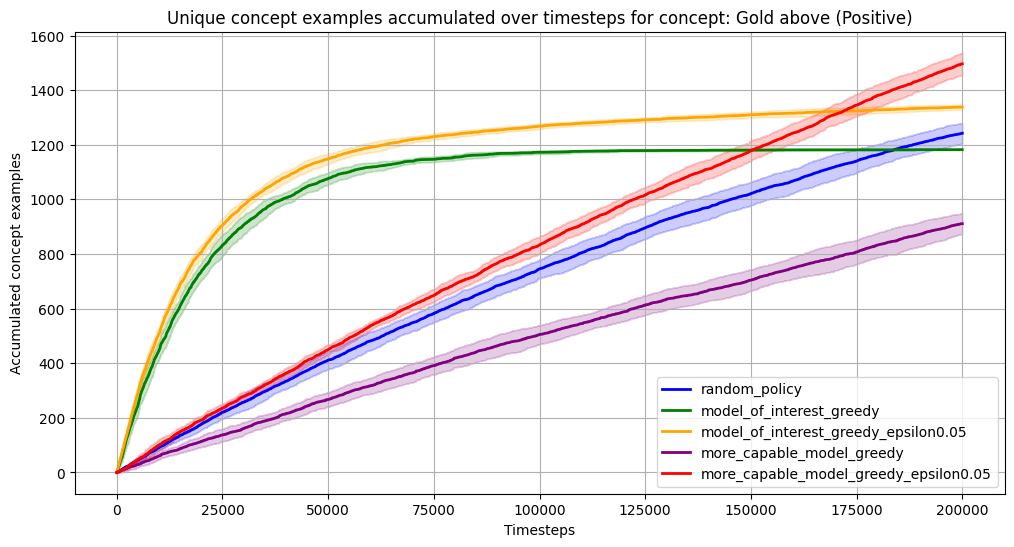

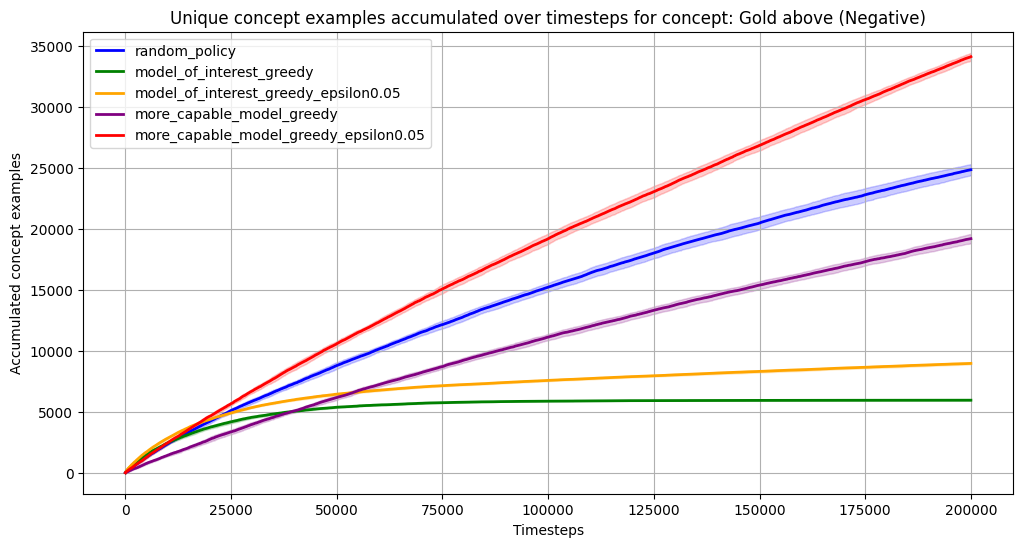

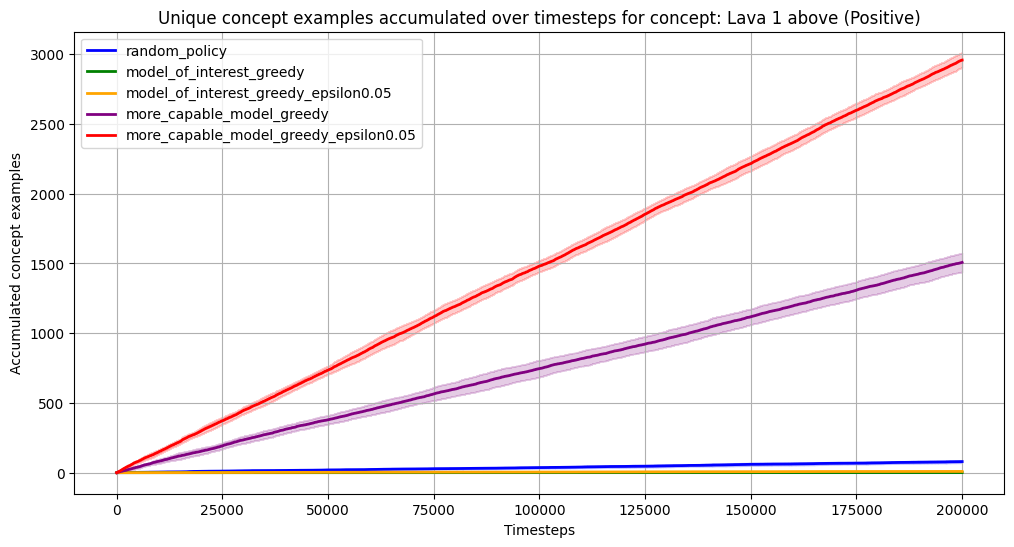

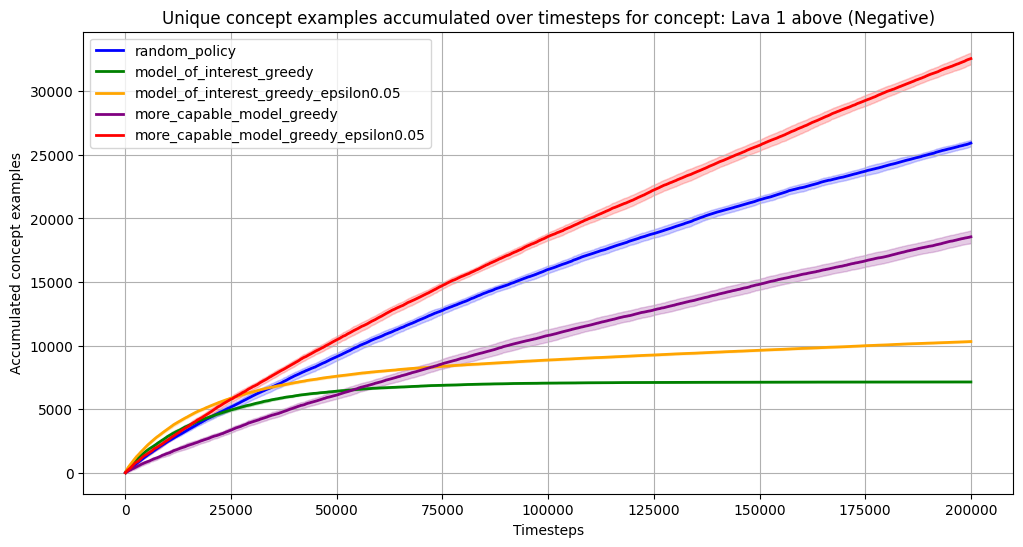

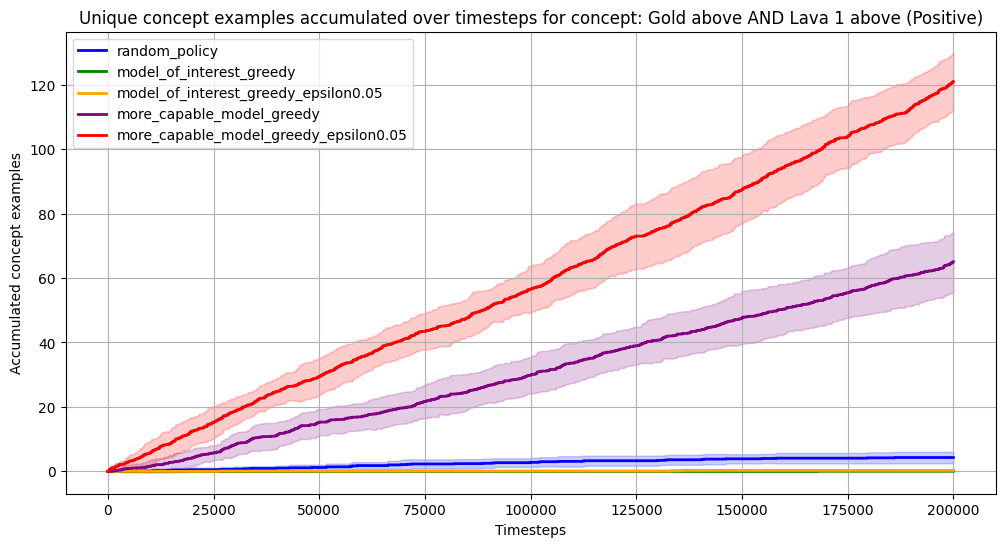

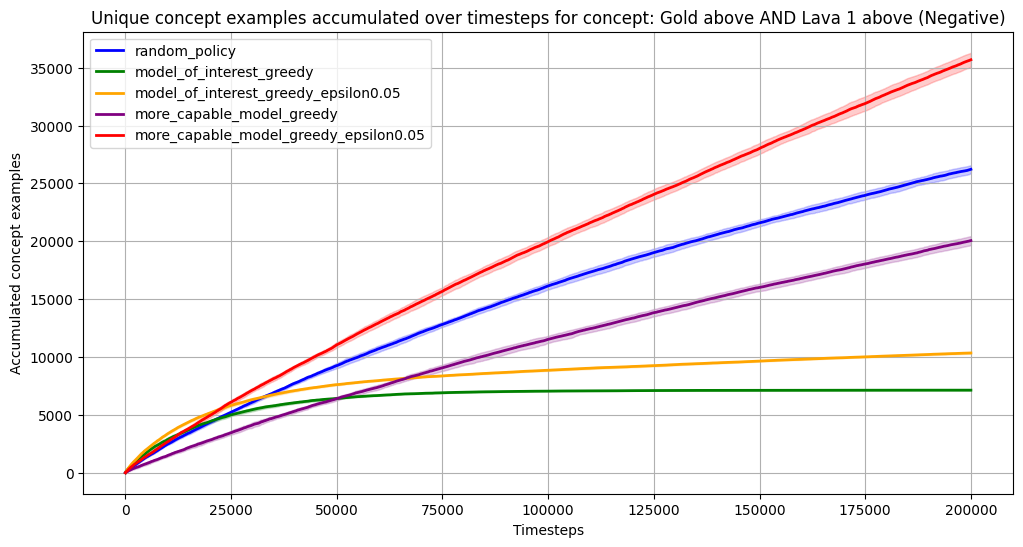

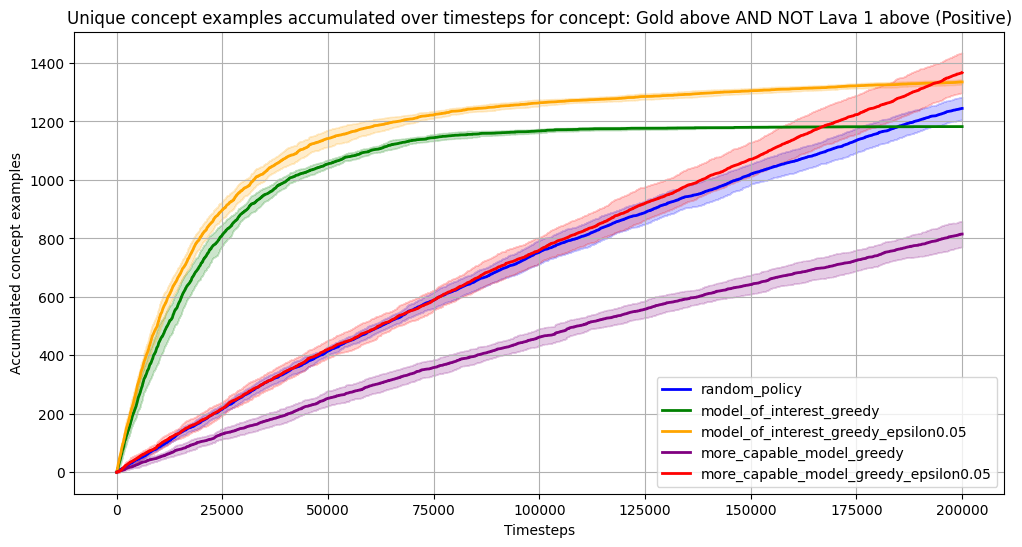

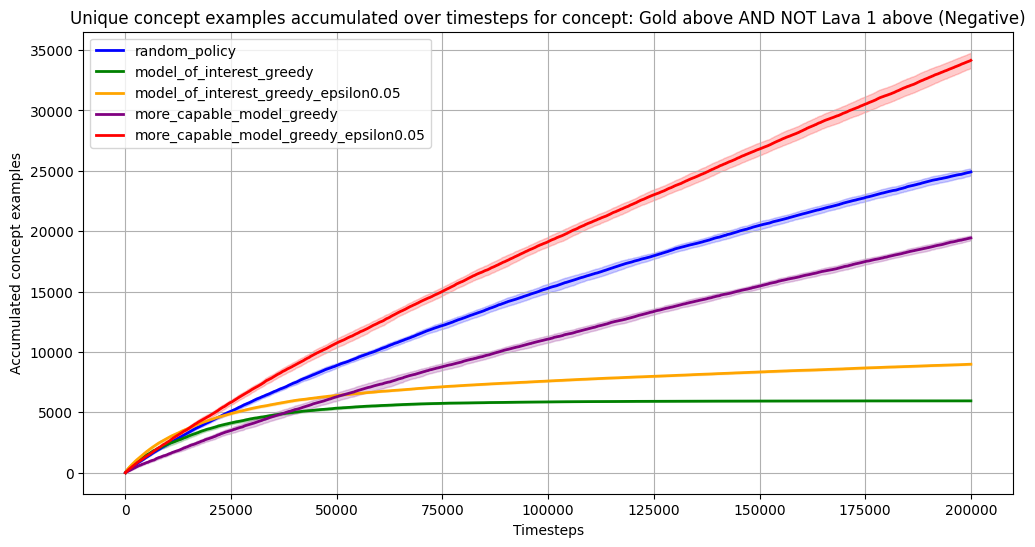

In [16]:
gold_above_pos_examples_acc_data = load_numpy_arrays_from_paths(grm_paths,"binary_concept_gold_above_positive_examples_accumulation_data_200000_iterations.npy")
gold_avobe_neg_examples_acc_data = load_numpy_arrays_from_paths(grm_paths,"binary_concept_gold_above_negative_examples_accumulation_data_200000_iterations.npy")


lava_1_above_pos_examples_acc_data = load_numpy_arrays_from_paths(grm_paths,"binary_concept_lava_1_above_positive_examples_accumulation_data_200000_iterations.npy")
lava_1_above_neg_examples_acc_data = load_numpy_arrays_from_paths(grm_paths,"binary_concept_lava_1_above_negative_examples_accumulation_data_200000_iterations.npy")

gold_above_and_lava_1_above_pos_examples_acc_data = load_numpy_arrays_from_paths(grm_paths, "binary_concept_gold_above_and_lava_1_above_positive_examples_accumulation_data_200000_iterations.npy")
gold_above_and_lava_1_above_neg_examples_acc_data = load_numpy_arrays_from_paths(grm_paths, "binary_concept_gold_above_and_lava_1_above_negative_examples_accumulation_data_200000_iterations.npy")

gold_above_and_not_lava_1_above_pos_examples_acc_data = load_numpy_arrays_from_paths(grm_paths, "binary_concept_gold_above_and_not_lava_1_above_positive_examples_accumulation_data_200000_iterations.npy")
gold_above_and_not_lava_1_above_neg_examples_acc_data = load_numpy_arrays_from_paths(grm_paths, "binary_concept_gold_above_and_not_lava_1_above_negative_examples_accumulation_data_200000_iterations.npy")




plot_concept_example_accumulation_per_approach(gold_above_pos_examples_acc_data, "Gold above (Positive)")
plot_concept_example_accumulation_per_approach(gold_avobe_neg_examples_acc_data, "Gold above (Negative)")

plot_concept_example_accumulation_per_approach(lava_1_above_pos_examples_acc_data, "Lava 1 above (Positive)")
plot_concept_example_accumulation_per_approach(lava_1_above_neg_examples_acc_data, "Lava 1 above (Negative)")

plot_concept_example_accumulation_per_approach(gold_above_and_lava_1_above_pos_examples_acc_data, "Gold above AND Lava 1 above (Positive)")
plot_concept_example_accumulation_per_approach(gold_above_and_lava_1_above_neg_examples_acc_data, "Gold above AND Lava 1 above (Negative)")

plot_concept_example_accumulation_per_approach(gold_above_and_not_lava_1_above_pos_examples_acc_data, "Gold above AND NOT Lava 1 above (Positive)")
plot_concept_example_accumulation_per_approach(gold_above_and_not_lava_1_above_neg_examples_acc_data, "Gold above AND NOT Lava 1 above (Negative)")

In [17]:
print(find_val_set_size(gold_above_pos_examples_acc_data, gold_avobe_neg_examples_acc_data))
print(find_val_set_size(lava_1_above_pos_examples_acc_data, lava_1_above_neg_examples_acc_data))
print(find_val_set_size(gold_above_and_lava_1_above_pos_examples_acc_data, gold_above_and_lava_1_above_neg_examples_acc_data))
print(find_val_set_size(gold_above_and_not_lava_1_above_pos_examples_acc_data, gold_above_and_not_lava_1_above_neg_examples_acc_data))



493.576
364.30400000000003
15.248000000000003
475.4480000000001
